# Hands-on Activity 1.3 | Transportation using Graphs

#### Objective(s):

This activity aims to demonstrate how to solve transportation related problem using Graphs

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to compute the shortest path from source to destination using graphs
* Apply DFS and BFS to compute the shortest path

#### Resources:
* Jupyter Notebook

#### Procedures:

1. Create a Node class

In [1]:
class Node(object):
    def __init__(self, name):
        """Assumes name is a string"""
        self.name = name
    def getName(self):
        return self.name
    def __str__(self):
        return self.name

2. Create an Edge class

In [2]:
class Edge(object):
    def __init__(self, src, dest):
        """Assumes src and dest are nodes"""
        self.src = src
        self.dest = dest
    def getSource(self):
        return self.src
    def getDestination(self):
        return self.dest
    def __str__(self):
        return self.src.getName() + '->' + self.dest.getName()

3. Create Digraph class that add nodes and edges

In [3]:
class Digraph(object):
    """edges is a dict mapping each node to a list of
    its children"""
    def __init__(self):
        self.edges = {}
    def addNode(self, node):
        # node parameter is a node object
        if node in self.edges: # conditional statement if the node is duplicated in the dictionary
            raise ValueError('Duplicate node')
        else:
            self.edges[node] = [] # if the node is not in the dictionary it will create a key in the dictionary
    def addEdge(self, edge):
        # edge parameter accepts an edge object
        src = edge.getSource() # gets the source
        dest = edge.getDestination() # gets the destination
        if not (src in self.edges and dest in self.edges): # check if the nodes is in the dictionary
            raise ValueError('Node not in graph')
        self.edges[src].append(dest) # make an edge directed ONLY to the DESTINATION (that's why it is digraph)
    def childrenOf(self, node):
        return self.edges[node] # return the list value of the node parameter
    def hasNode(self, node): # method for checking if the node is in the
        return node in self.edges # returns TRUE if the node is in the dict otherwise, returns FALSE
    def getNode(self, name): # method for getting the node
        for n in self.edges: # loops the nodes stored in the dictionary
            if n.getName() == name: # conditional statement if the node is found in the dict
                return n
        raise NameError(name) # raise an error if the node is not in the dictionary
    def __str__(self):
        result = ''
        for src in self.edges: 
            for dest in self.edges[src]:
                result = result + src.getName() + '->'\
                         + dest.getName() + '\n'
        return result[:-1] #omit final newline

4. Create a Graph class from Digraph class that deifnes the destination and Source

In [4]:
class Graph(Digraph):
    def addEdge(self, edge):
        Digraph.addEdge(self, edge) # connects the source and the destination
        rev = Edge(edge.getDestination(), edge.getSource())
        Digraph.addEdge(self, rev) # connects the destination and source; two way connection

5. Create a buildCityGraph method to add nodes (City) and edges   (source to destination)

In [5]:
def buildCityGraph(graphType):
    # the graphtype paramater determines whether the Graph is unidirectional or bidirectional
    g = graphType() 
    for name in ('Boston', 'Providence', 'New York', 'Chicago', 'Denver', 'Phoenix', 'Los Angeles'):
        #Create 7 nodes
        g.addNode(Node(name))
    g.addEdge(Edge(g.getNode('Boston'), g.getNode('Providence')))
    g.addEdge(Edge(g.getNode('Boston'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('Providence'), g.getNode('Boston')))
    g.addEdge(Edge(g.getNode('Providence'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('New York'), g.getNode('Chicago')))
    g.addEdge(Edge(g.getNode('Chicago'), g.getNode('Denver')))
    g.addEdge(Edge(g.getNode('Denver'), g.getNode('Phoenix')))
    g.addEdge(Edge(g.getNode('Denver'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('Los Angeles'), g.getNode('Boston')))
    return g

In [6]:
def printPath(path):
    """Assumes path is a list of nodes"""
    result = ''
    for i in range(len(path)):
        result = result + str(path[i])
        if i != len(path) - 1:
            result = result + '->'
    return result

6. Create a method to define DFS technique

In [7]:
def DFS(graph, start, end, path, shortest, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes;
          path and shortest are lists of nodes
       Returns a shortest path from start to end in graph"""
    print('now doing the dfs traversal...')
    # graph 
    path = path + [start] 
    if toPrint:
        print('Current DFS path:', printPath(path)) # tracker for the travelled paths(prints the paths traversed)
    if start == end: # conditional statement if the source and the destination is the same
        return path 
    for node in graph.childrenOf(start): # loop for exploration of the current node to its neighbor/children
        if node not in path: #avoid cycles # checks if the neighbor is not in the path 
            if shortest == None or len(path) < len(shortest): 
                '''conditional statement if path is not found or comparing the length of two found paths'''
                newPath = DFS(graph, node, end, path, shortest,
                              toPrint) # recursion for exploring the first children of the source node
                if newPath != None:
                    shortest = newPath
        elif toPrint:
            print('Already visited', node)
    return shortest

7. Define a shortestPath method to return the shortest path from source to destination using DFS

In [8]:
def shortestPathDFS(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return DFS(graph, start, end, [], None, toPrint)

8. Create a method to test the shortest path method

In [9]:
def DFStestSP(source, destination):
    g = buildCityGraph(Digraph) # object for building map graph
    sp = shortestPathDFS(g, g.getNode(source), g.getNode(destination),
                      toPrint = True) 
    if sp != None:
        print('Shortest path from', source, 'to',
              destination, 'is', printPath(sp))
    else:
        print('There is no path from', source, 'to', destination)

9. Execute the testSP method

In [10]:
DFStestSP('Boston','Boston')

now doing the dfs traversal...
Current DFS path: Boston
Shortest path from Boston to Boston is Boston


In [11]:
DFStestSP('Boston', 'Phoenix')

now doing the dfs traversal...
Current DFS path: Boston
now doing the dfs traversal...
Current DFS path: Boston->Providence
Already visited Boston
now doing the dfs traversal...
Current DFS path: Boston->Providence->New York
now doing the dfs traversal...
Current DFS path: Boston->Providence->New York->Chicago
now doing the dfs traversal...
Current DFS path: Boston->Providence->New York->Chicago->Denver
now doing the dfs traversal...
Current DFS path: Boston->Providence->New York->Chicago->Denver->Phoenix
Already visited New York
now doing the dfs traversal...
Current DFS path: Boston->New York
now doing the dfs traversal...
Current DFS path: Boston->New York->Chicago
now doing the dfs traversal...
Current DFS path: Boston->New York->Chicago->Denver
now doing the dfs traversal...
Current DFS path: Boston->New York->Chicago->Denver->Phoenix
Already visited New York
Shortest path from Boston to Phoenix is Boston->New York->Chicago->Denver->Phoenix


##### Question:
    
Describe the DFS method to compute for the shortest path using the given sample codes

Answer:
    the function dfs that is used to compute for the shortest path has 6 parameter and those are:
        graph - the graph parameter is a digraph/graph that was built in the buildCityGraph function
        start - start parameter accepts a node object and that is the current location of the user
        end - end parameter also accepts a node object and that is the destination of the user
        path - the path parameter is used as a tracker on what locations that we had explored
        shortest - the shortest parameter is parameter that will be used in out putting the shortest path of the problem
        toPrint - it is a bollean integer whether we should print the locations/ nodes that have been visited

in the function the start node is added to the path variable so that we can track the places that has been explored. 

next in the function there is a conditional statement on whether we whould print the path that the graph has traveled

next conditional statement is whether if the user inputted the same location as source and destination, this conditional statement can also be used to check if we have traveled successfully to our destination.

if we still haven't arrive/traveled successfully to our destination, a for loop will be executed with the condition of graph.childrenOf(start) meaning we will explore the connection of the given node to explore the adjacent node a recursive function will be called

if we have found a path from source to the destination (newpath) it will update the 'shortest' variable as the short path

if there are multiple paths from source to the destination a condition will be checked, that condition will be len(path) < len(shortest) if the condition holds true the recursive function will be called, thus will update the shortest path, other wise it'll skip the code

after we have explored through the nodes, the function will return the shortest path

10. Create a method to define BFS technique

In [12]:
def BFS(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    print('now doing the bfs traversal...')
    initPath = [start]
    pathQueue = [initPath]
    while len(pathQueue) != 0:
        #Get and remove oldest element in pathQueue
        tmpPath = pathQueue.pop(0)
        if toPrint:
            print('Current BFS path:', printPath(tmpPath))
        lastNode = tmpPath[-1]
        if lastNode == end:
            return tmpPath
        for nextNode in graph.childrenOf(lastNode):
            if nextNode not in tmpPath:
                newPath = tmpPath + [nextNode]
                pathQueue.append(newPath)
    return None

11. Define a shortestPath method to return the shortest path from source to destination using DFS

In [13]:
def shortestPathBFS(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return BFS(graph, start, end, toPrint)

In [14]:
def BFStestSP(source, destination):
    g = buildCityGraph(Digraph) # object for building map graph
    sp = shortestPathBFS(g, g.getNode(source), g.getNode(destination),
                      toPrint = True) 
    if sp != None:
        print('Shortest path from', source, 'to',
              destination, 'is', printPath(sp))
    else:
        print('There is no path from', source, 'to', destination)

12. Execute the testSP method

In [15]:
BFStestSP('Boston', 'Phoenix')

now doing the bfs traversal...
Current BFS path: Boston
Current BFS path: Boston->Providence
Current BFS path: Boston->New York
Current BFS path: Boston->Providence->New York
Current BFS path: Boston->New York->Chicago
Current BFS path: Boston->Providence->New York->Chicago
Current BFS path: Boston->New York->Chicago->Denver
Current BFS path: Boston->Providence->New York->Chicago->Denver
Current BFS path: Boston->New York->Chicago->Denver->Phoenix
Shortest path from Boston to Phoenix is Boston->New York->Chicago->Denver->Phoenix


#### Question:
    
Describe the BFS method to compute for the shortest path using the given sample codestion:
    
Answer:
    
    the BFS function that is used to compute for the shortest path of the graph using breadth-first search, accepts 4 parameters:
    graph - the graph parameter accpets a digraph/graph object that is used to implement the bfs
    start - start parameter accepts a node object and that is the current location of the user
    end - end parameter also accepts a node object and that is the destination of the user
    toPrint - it is a bollean integer whether we should print the locations/ nodes that have been visited
    
    if you passed the parameters and called the function successfully it will run the code
    it will initialize two variables, those are:
    
    initPath - it is a list containing only the start node
    pathQueue - it is also a list that gets the node from the init path the pathQueue will serve as an indicator of which nodes or what nodes do we still need to explore
    
    after the initialization the traversal using the while loop and will execute the following:
    - While 'pathQueue' is not empty:
     - dequeue the oldest path 'tmpPath' from the front of the queue.
     - if the 'toPrint' flag is set to 'True', print the current path.
     - get the last node 'lastNode' from 'tmpPath'.
     - if 'lastNode' is equal to the 'end' node, return 'tmpPath' as the shortest path found.
     - iterate over all the child nodes ('nextNode') of 'lastNode' in the graph:
       - if 'nextNode' is not already visited (i.e., not present in 'tmpPath'):
         - create a new path 'newPath' by appending 'nextNode' to 'tmpPath'.
         - enqueue 'newPath' into 'pathQueue' for further exploration.

#### Supplementary Activitiy
* Use a specific location or city to solve transportation using graph
* Use DFS and BFS methods to compute the shortest path
* Display the shortest path from source to destination using DFS and BFS
* Differentiate the performance of DFS from BFS

## DFS on a Directed Graph
### DIRECTED GRAPH VISUAL REPRESENTATION:
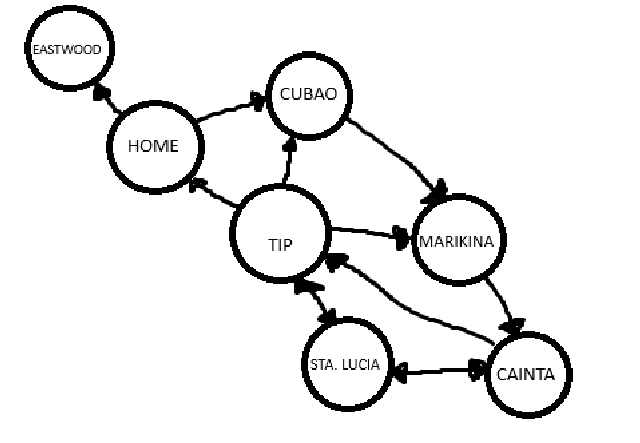

In [16]:
# type your code here using DFS
def supplbuildCityGraph(graphType):
    # the graphtype paramater determines whether the Graph is unidirectional or bidirectional
    g = graphType() 
    for name in ('TIP', 'HOME', 'EASTWOOD', 'CUBAO', 'MARIKINA', 'STA. LUCIA','CAINTA'):
        #Create 7 nodes
        g.addNode(Node(name))
    g.addEdge(Edge(g.getNode('TIP'), g.getNode('HOME')))
    g.addEdge(Edge(g.getNode('TIP'), g.getNode('CUBAO')))
    g.addEdge(Edge(g.getNode('TIP'), g.getNode('MARIKINA')))
    g.addEdge(Edge(g.getNode('TIP'), g.getNode('STA. LUCIA')))
    g.addEdge(Edge(g.getNode('HOME'), g.getNode('EASTWOOD')))
    g.addEdge(Edge(g.getNode('HOME'), g.getNode('CUBAO')))
    g.addEdge(Edge(g.getNode('MARIKINA'), g.getNode('CAINTA')))
    g.addEdge(Edge(g.getNode('CUBAO'), g.getNode('MARIKINA')))
    g.addEdge(Edge(g.getNode('STA. LUCIA'), g.getNode('CAINTA')))
    g.addEdge(Edge(g.getNode('CAINTA'), g.getNode('STA. LUCIA')))
    g.addEdge(Edge(g.getNode('CAINTA'), g.getNode('TIP')))
    g.addEdge(Edge(g.getNode('STA. LUCIA'), g.getNode('TIP')))
    print(g)
    return g

In [17]:
# code for DFS
def DFSsuppltestSP(source, destination):
    g = supplbuildCityGraph(Digraph) # object for building map graph
    sp = shortestPathDFS(g, g.getNode(source), g.getNode(destination),
                      toPrint = True) 
    if sp != None:
        print('Shortest path from', source, 'to',
              destination, 'is', printPath(sp))
    else:
        print('There is no path from', source, 'to', destination)

In [18]:
# code for BFS
def BFSsuppltestSP(source, destination):
    g = supplbuildCityGraph(Digraph) # object for building map graph
    sp = shortestPathBFS(g, g.getNode(source), g.getNode(destination),
                      toPrint = True) 
    if sp != None:
        print('Shortest path from', source, 'to',
              destination, 'is', printPath(sp))
    else:
        print('There is no path from', source, 'to', destination)

In [19]:
def printPlaces(): # function for printing the list of places in the transportation
    places = ['TIP', 'HOME', 'EASTWOOD', 'CUBAO', 'MARIKINA', 'STA. LUCIA','CAINTA']
    num = 1
    for i in places:
        print(num,' ', i)
        num += 1
def getRoute(): 
    a = ''
    a = ''
    printPlaces()
    src = int(input('Where are you now? \nplease select a valid location:'))
    match src:
        case 1:
            a = 'TIP'
        case 2:
            a = 'HOME'
        case 3:
            a = 'EASTWOOD'
        case 4:
            a = 'CUBAO'
        case 5:
            a = 'MARIKINA'
        case 6:
            a = 'STA. LUCIA'
        case 7:
            a = 'CAINTA'
        case _:
            print('please enter a valid choice!')
            return None

    printPlaces()
    dest = int(input('Where do you want to go? \nplease select a valid location: '))
    match dest:
        case 1:
            b = 'TIP'
        case 2:
            b = 'HOME'
        case 3:
            b = 'EASTWOOD'
        case 4:
            b = 'CUBAO'
        case 5:
            b = 'MARIKINA'
        case 6:
            b = 'STA. LUCIA'
        case 7:
            b = 'CAINTA'
        case _:
            print('please enter a valid choice!')
            return None
    trav = int(input('1 BFS or 2 DFS?\n'
                     'input: '))
    if trav == 2:
        DFSsuppltestSP(a,b)
    if trav == 1:
        BFSsuppltestSP(a,b)

In [20]:
interface = True
while interface:
    response = int(input('=======================\n'
          '1 Get Route\n'
          '0 Exit\n'
          '=======================\n'
          'input: '))
    
    match response:
        case 1:
            getRoute()
        case 0:
            interface = False
            print('now exiting...')
        case _:
            print('Please enter a valid choice!')

1 Get Route
0 Exit
input: 1
1   TIP
2   HOME
3   EASTWOOD
4   CUBAO
5   MARIKINA
6   STA. LUCIA
7   CAINTA
Where are you now? 
please select a valid location:7
1   TIP
2   HOME
3   EASTWOOD
4   CUBAO
5   MARIKINA
6   STA. LUCIA
7   CAINTA
Where do you want to go? 
please select a valid location: 2
1 BFS or 2 DFS?
input: 1
TIP->HOME
TIP->CUBAO
TIP->MARIKINA
TIP->STA. LUCIA
HOME->EASTWOOD
HOME->CUBAO
CUBAO->MARIKINA
MARIKINA->CAINTA
STA. LUCIA->CAINTA
STA. LUCIA->TIP
CAINTA->STA. LUCIA
CAINTA->TIP
now doing the bfs traversal...
Current BFS path: CAINTA
Current BFS path: CAINTA->STA. LUCIA
Current BFS path: CAINTA->TIP
Current BFS path: CAINTA->STA. LUCIA->TIP
Current BFS path: CAINTA->TIP->HOME
Shortest path from CAINTA to HOME is CAINTA->TIP->HOME
1 Get Route
0 Exit
input: 1
1   TIP
2   HOME
3   EASTWOOD
4   CUBAO
5   MARIKINA
6   STA. LUCIA
7   CAINTA
Where are you now? 
please select a valid location:7
1   TIP
2   HOME
3   EASTWOOD
4   CUBAO
5   MARIKINA
6   STA. LUCIA
7   CAINTA
Wher

#Type your evaluation about the performance of DFS and BFS

my evaluation after testing and studying the codes of DFS and BFS is that bfs avoids cycle in traversing through the graph unlike dfs which has a probability to make a cycle and get stuck in a loop as shown above on my output code when I use the dfs traversing method it has a prompt if we have created a cycle i have also evaluated that bfs only focuses on the path from the source to the destination unlike the dfs which traverses on other places that are not invloved in the path to the destination or the dfs checks all the node before going to the destination

#### Conclusion

after doing this lab activity I have concluded that bfs traversal is more optimal than dfs traversal because as I have evaluated earlier dfs traverses all the nodes that not leads to the destination, I have concluded or observed that dfs may be suitable for maze problem solving, I have also concluded that the worst case of bfs might take effect on the degree of a node of number of edges that a node contains, and the worst case of the dfs might take effect on the on how deep the connection of the graph created (graphs connected on a chains)